# 1. Análise Exploratória de Dados

# 1.1 Resumo de Dados

**Por que este é o primeiro passo de qualquer modelagem estatística?**

Em alguma fase de seu trabalho, o pesquisador depara-se com o problema de **analisar e entender um conjunto de dados** relevante ao seu particular objeto de estudos. <br> 

Ele necessitará trabalhar os dados para **transformá-los em informações**, para compará-los com outros resultados, ou ainda para julgar sua adequação a alguma teoria. <br> 

De modo bem geral, podemos dizer que a essência da Ciência é a **observação** e que seu objetivo básico é a **inferência**, 
que pode ser dedutiva (na qual se argumenta das premissas às conclusões) ou indutiva (por meio da qual se vai do específico ao geral). <br> 

A **inferência estatística** é uma das partes da Estatística. Esta é a parte da metodologia da Ciência que tem por objetivo a **coleta, redução, análise e modelagem dos dados**, a partir do que, finalmente, faz-se a **inferência para uma população** da qual os dados (a amostra) foram obtidos. <br> 

Neste primeiro capítulo estaremos interessados na redução, análise e interpretação dos dados sob consideração, adotando um enfoque que chamaremos de análise exploratória de dados. Nessa abordagem tentaremos obter dos dados a maior
quantidade possível de informação, que indique modelos plausíveis a serem utilizados numa fase posterior, a análise confirmatória de dados (ou inferência estatística). <br> 


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
import math

In [7]:
df = pd.read_csv('C:/Users/Maria Tereza Boada/Desktop/Estatística/datasets/funcionarios.csv')
df.head(10)

,N,Gênero,Estado Civil,Grau de Instrução,N de Filhos,Salario (x Sal Min),Anos,Meses,Região de Procedência
0,1,M,solteiro,ensino fundamental,0,4.00,26,3,interior
1,2,F,casado,ensino fundamental,1,4.56,32,10,capital
2,3,M,casado,ensino fundamental,2,5.25,36,5,capital
3,4,F,solteiro,ensino médio,0,5.73,20,10,outra
4,5,M,solteiro,ensino fundamental,0,6.26,40,7,outra
5,6,M,casado,ensino fundamental,0,6.66,28,0,interior
6,7,M,solteiro,ensino fundamental,0,6.86,41,0,interior
7,8,F,solteiro,ensino fundamental,0,7.39,43,4,capital
8,9,M,casado,ensino médio,1,7.59,34,10,capital
9,10,F,solteiro,ensino médio,0,7.44,23,6,outra


## 1.1.1. Classificação das Variáveis

Primeiramente podemos identificar as variáveis como **Qualitativas** e **Quantitativas**. <br>

Dentre as variáveis **qualitativas**, podemos fazer uma distinção entre dois tipos: variável qualitativa **nominal**, para a qual não existe nenhuma ordenação nas possíveis realizações, e variável qualitativa **ordinal**, para a qual existe uma ordem  categórica nos seus resultados. A região de procedência, do dataset acima, é um caso de variável **nominal**, enquanto grau de instrução é um Exemplo de variável **ordinal**, pois ensinos fundamental, médio e superior correspondem a uma ordenação baseada no número de anos de escolaridade completos. A variável **qualitativa** classe social, com as possíveis realizações alta, média e baixa, é outro exemplo de variável ordinal.


De modo análogo, as variáveis **quantitativas** também podem ser classificadas em dois tipos: variáveis **quantitativas discretas**, assumem apenas valores inteiros e formam um conjunto finito ou enumerável de números, e que resultam, freqüentemente, de uma contagem, como por exemplo número de filhos (0, 1, 2, ...); e variáveis **quantitativas contínuas**, cujos possíveis valores pertencem a um intervalo de números reais e que resultam de uma mensuração, como por exemplo estatura e peso de um indivíduo.



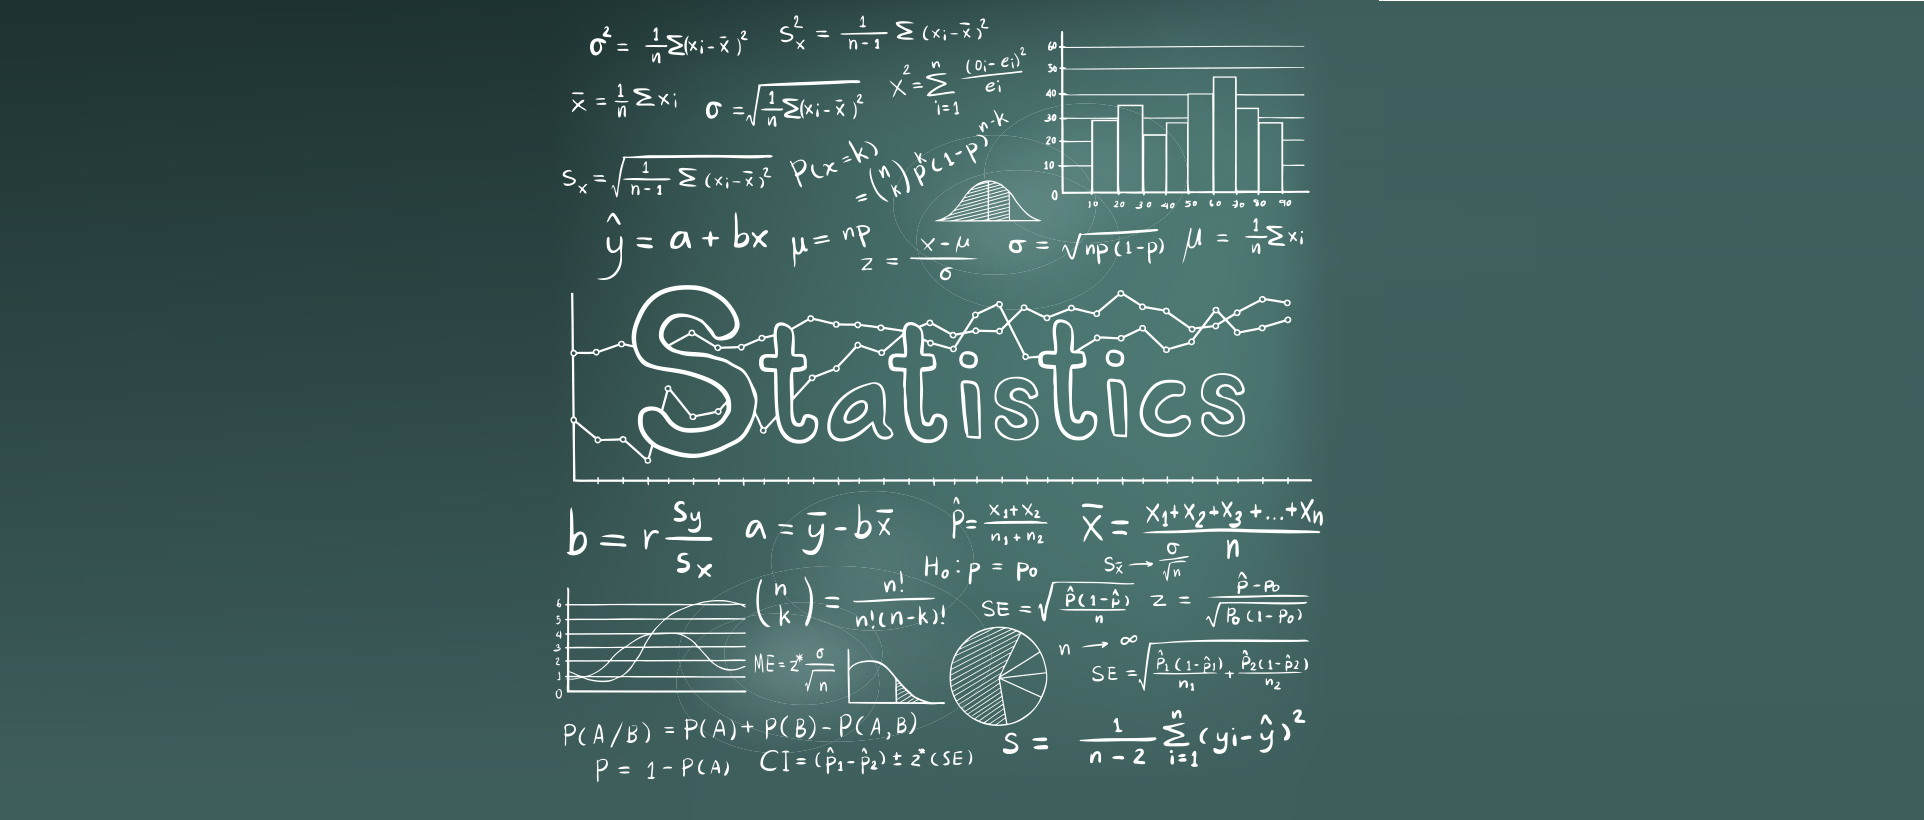

Este passo é importante porque para cada tipo de variável existem técnicas apropriadas para resumir as informações (padronização, normalização, discretização, etc.) que veremos mais a frente. <br>

Neste dataset temos como Qualitativas:

⚬ Gênero <br>
⚬ Estado Civil <br>
⚬ Região de Procedência  <br>
⚬ Grau de Instrução

Neste dataset temos como Quantitativas:

⚬ N de Filhos <br>
⚬ Salario <br>
⚬ Anos  <br>
⚬ Meses  <br>

Em alguns casos pode-se transformar variáveis qualitativas em quantitativas, atribuindo valores numéricos às várias qualidades ou atributos (ou, ainda, classes) de uma variável qualitativa e depois proceder-se à análise como se esta fosse quantitativa, desde que o procedimento seja passível de interpretação.

Existe um tipo de variável qualitativa para a qual essa quantificação é muito útil: a chamada variável dicotômica. Para essa variável só podem ocorrer duas realizações, usualmente chamadas sucesso e fracasso. 

Trazer as informações (**df.info**) da base de dados indica como estão armazenas as variáveis. Em alguns casos pode ser necessário transformar uma variável armazenada como **int** em **object**. Por exemplo, caso a variável **Gênero** estivesse expressa como **0** e **1** para indicar **Masculino** e **Feminino**,ao aplicarmos **df.info()** na base ela seria inicialmente classificada como **int** (como uma variável quantitativa),  e precisaríamos fazer a conversão para **object** para ser tratada como qualitativa em nossas análises. Poderíamos usar o comando **df['Gênero'].astype(str)** para fazer a conversão.

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   N                      36 non-null     int64  
 1   Gênero                 36 non-null     object 
 2   Estado Civil           36 non-null     object 
 3   Grau de Instrução      36 non-null     object 
 4   N de Filhos            36 non-null     int64  
 5   Salario (x Sal Min)    36 non-null     float64
 6   Anos                   36 non-null     int64  
 7   Meses                  36 non-null     int64  
 8   Região de Procedência  36 non-null     object 
dtypes: float64(1), int64(4), object(4)
memory usage: 2.7+ KB


**Exemplos** <br>

**Quantitativa Discreta:** número de filhos, número de irmãos, número de alunos, número de pets  <br>
**Quantitativa Contínua:** altura, peso, salário, área, latitude, longitude, idade <br>
**Qualitativa Ordinal:** grau de escolaridade, colocação em um ranking, classe social, nível de satisfação em uma pesquisa <br>
**Qualitativa Nominal:** cores, nomes, marcas, cidade, país, estado



**Obs:** Em geral o campo ID não precisa sofrer um processo de classificação e transformação, apenas as demais variáveis do dataset.

## 1.1.2. Distribuição de Freqüências 

Quando se estuda uma variável, o maior interesse do pesquisador é conhecer o comportamento dessa variável, analisando a ocorrência de suas possíveis realizações. A **distribuição de frequência** nos mostra um agrupamento de dados resumidos, dividida em classes mutuamente exclusivas e o **número de ocorrências** de uma classe.

**Distribuição de Freqüências para Variáveis Qualitativas**

A distribuição de frequências para variáveis **qualitativas ordinais** e **qualitativas nominais** pode ser feita da seguinte maneira:

In [160]:
frequencia = df['Gênero'].value_counts()
proporcao = df['Gênero'].value_counts(normalize = True)
percentual = df['Gênero'].value_counts(normalize = True)*100
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Proporção': proporcao, 'Porcentagem(%)': percentual})
dist_freq_qualitativas

,Frequência,Proporção,Porcentagem(%)
M,20,0.555556,55.555556
F,16,0.444444,44.444444


In [161]:
frequencia = df['Estado Civil'].value_counts()
proporcao = df['Estado Civil'].value_counts(normalize = True)
percentual = df['Estado Civil'].value_counts(normalize = True)*100
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Proporção': proporcao, 'Porcentagem(%)': percentual})
dist_freq_qualitativas

,Frequência,Proporção,Porcentagem(%)
casado,20,0.555556,55.555556
solteiro,16,0.444444,44.444444


In [162]:
frequencia = df['Grau de Instrução'].value_counts()
proporcao = df['Grau de Instrução'].value_counts(normalize = True)
percentual = df['Grau de Instrução'].value_counts(normalize = True)*100
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Proporção': proporcao, 'Porcentagem(%)': percentual})
dist_freq_qualitativas

,Frequência,Proporção,Porcentagem(%)
ensino médio,18,0.500000,50.000000
ensino fundamental,12,0.333333,33.333333
superior,6,0.166667,16.666667


In [163]:
frequencia = df['Região de Procedência'].value_counts()
proporcao = df['Região de Procedência'].value_counts(normalize = True)
percentual = df['Região de Procedência'].value_counts(normalize = True)*100
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Proporção': proporcao, 'Porcentagem(%)': percentual})
dist_freq_qualitativas

,Frequência,Proporção,Porcentagem(%)
outra,13,0.361111,36.111111
interior,12,0.333333,33.333333
capital,11,0.305556,30.555556


**Distribuição de Freqüências para Variáveis Quantitativas**

A distribuição de frequências para variáveis **quantitativas discretas** também pode ser calculada da mesma maneira:

In [164]:
frequencia = df['N de Filhos'].value_counts()
proporcao = df['N de Filhos'].value_counts(normalize = True)
percentual = df['N de Filhos'].value_counts(normalize = True)*100
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Proporção': proporcao, 'Porcentagem(%)': percentual})
dist_freq_qualitativas

,Frequência,Proporção,Porcentagem(%)
0,20,0.555556,55.555556
2,7,0.194444,19.444444
1,5,0.138889,13.888889
3,3,0.083333,8.333333
5,1,0.027778,2.777778


A distribuição de frequências para variáveis **quantitativas contínuas**, como no exemplo o **Salario (x Sal Min)** exige o agrupamento em faixas de valores (**discretização da variável**) para que possamos obter uma melhor visualização da tabela de frequências.

Repare que extraindo a tabela de frequências de uma variável **quantitativas contínua** sem discretização por faixas você não obtém uma boa visualização:

In [165]:
#Então calcula-se a frequência por faixa para melhor vizualização
frequencia = df['Salario (x Sal Min)'].value_counts()
proporcao = df['Salario (x Sal Min)'].value_counts(normalize = True)
percentual = df['Salario (x Sal Min)'].value_counts(normalize = True)*100
dist_freq_quantitativas = pd.DataFrame({'Frequência': frequencia, 'Proporção': proporcao, 'Porcentagem(%)': percentual})
dist_freq_quantitativas

,Frequência,Proporção,Porcentagem(%)
4.00,1,0.027778,2.777778
4.56,1,0.027778,2.777778
11.06,1,0.027778,2.777778
11.59,1,0.027778,2.777778
12.00,1,0.027778,2.777778
12.79,1,0.027778,2.777778
13.23,1,0.027778,2.777778
13.60,1,0.027778,2.777778
13.85,1,0.027778,2.777778
14.69,1,0.027778,2.777778


Para determinar o número ótimo de faixas de uma variável contínua em geral utiliza-se a **Regra de Sturges**, que veremos mais a frente.

No entanto, uma maneira relativamente sofisticada para dividir a amostra é através do cálculo de **intervalo interquartil**, diferentemente da **Regra de Sturges** ele garante que as faixas sejam distribuídas em pesos iguais (25%), mesmo que existam valores extremos na amostra. Costumo utilizar essa metodologia na discretização por faixas por sua simplicidade e elegância.

Aqui teremos, por exemplo:

In [166]:
minimo = min(df['Salario (x Sal Min)'])   
Q1 =  np.percentile(df['Salario (x Sal Min)'], 25)
Q2 =  np.percentile(df['Salario (x Sal Min)'], 50)
Q3 =  np.percentile(df['Salario (x Sal Min)'], 75)
maximo = max(df['Salario (x Sal Min)'])    
print(minimo, Q1, Q2, Q3, maximo)

4.0 7.5525 10.165 14.059999999999999 23.3


In [167]:
df.loc[(df['Salario (x Sal Min)'] >= minimo) & (df['Salario (x Sal Min)'] <= Q1), 'fx_salario']=1.0
df.loc[(df['Salario (x Sal Min)'] > Q1) & (df['Salario (x Sal Min)'] <= Q2), 'fx_salario']=2.0
df.loc[(df['Salario (x Sal Min)'] >  Q2)  & (df['Salario (x Sal Min)'] <=Q3), 'fx_salario']=3.0
df.loc[(df['Salario (x Sal Min)'] >  Q3) & (df['Salario (x Sal Min)'] <= maximo), 'fx_salario']=4.0
df.head(10)

,N,Gênero,Estado Civil,Grau de Instrução,N de Filhos,Salario (x Sal Min),Anos,Meses,Região de Procedência,fx_salario
0,1,M,solteiro,ensino fundamental,0,4.00,26,3,interior,1.0
1,2,F,casado,ensino fundamental,1,4.56,32,10,capital,1.0
2,3,M,casado,ensino fundamental,2,5.25,36,5,capital,1.0
3,4,F,solteiro,ensino médio,0,5.73,20,10,outra,1.0
4,5,M,solteiro,ensino fundamental,0,6.26,40,7,outra,1.0
5,6,M,casado,ensino fundamental,0,6.66,28,0,interior,1.0
6,7,M,solteiro,ensino fundamental,0,6.86,41,0,interior,1.0
7,8,F,solteiro,ensino fundamental,0,7.39,43,4,capital,1.0
8,9,M,casado,ensino médio,1,7.59,34,10,capital,2.0
9,10,F,solteiro,ensino médio,0,7.44,23,6,outra,1.0


In [168]:
#Então calcula-se a frequência por faixa para melhor vizualização
frequencia = df['fx_salario'].value_counts()
proporcao = df['fx_salario'].value_counts(normalize = True)
percentual = df['fx_salario'].value_counts(normalize = True)*100
dist_freq_quantitativas = pd.DataFrame({'Frequência': frequencia, 'Proporção': proporcao, 'Porcentagem(%)': percentual})
dist_freq_quantitativas

,Frequência,Proporção,Porcentagem(%)
1.0,9,0.25,25.0
2.0,9,0.25,25.0
3.0,9,0.25,25.0
4.0,9,0.25,25.0


Perceba que determinando as faixas por **intervalo interquartil** você distribui igualmente as faixas salariais (25% em cada faixa). <br> Explicaremos o conceito de **quartil** mais a frente, assim como **decil** e **percentil**.

Idade é considerada uma variável **quantitativa contínua** pois, embora possa estar armazenada na base de dados como um número inteiro (20, 30, 40) ela é uma variável contínua no tempo, você pode ter, por exemplo 20 anos 5 meses 3 dias 10 horas 3 minutos de idade. Enquanto isso, número de filhos, é sempre **quantitativa discreta** porque você não pode ter uma fração de filho! Apenas números inteiros. <br> No exemplo acima temos a idade em anos e meses. 

In [169]:
df['Idade'] = df['Anos'] + df['Meses']/12
df.head()

,N,Gênero,Estado Civil,Grau de Instrução,N de Filhos,Salario (x Sal Min),Anos,Meses,Região de Procedência,fx_salario,Idade
0,1,M,solteiro,ensino fundamental,0,4.00,26,3,interior,1.0,26.250000
1,2,F,casado,ensino fundamental,1,4.56,32,10,capital,1.0,32.833333
2,3,M,casado,ensino fundamental,2,5.25,36,5,capital,1.0,36.416667
3,4,F,solteiro,ensino médio,0,5.73,20,10,outra,1.0,20.833333
4,5,M,solteiro,ensino fundamental,0,6.26,40,7,outra,1.0,40.583333


Para distribuir a Idadeem faixas etárias vou utilizar também o **intervalo interquartil**

In [170]:
minimo = min(df['Idade'])   
Q1 =  np.percentile(df['Idade'], 25)
Q2 =  np.percentile(df['Idade'], 50)
Q3 =  np.percentile(df['Idade'], 75)
maximo = max(df['Idade'])    
print(minimo, Q1, Q2, Q3, maximo)

20.833333333333332 30.666666666666668 34.91666666666667 40.520833333333336 48.916666666666664


In [171]:
df.loc[(df['Idade'] >= minimo) & (df['Idade'] <= Q1), 'fx_idade']=1.0
df.loc[(df['Idade'] > Q1) & (df['Idade'] <= Q2), 'fx_idade']=2.0
df.loc[(df['Idade'] >  Q2)  & (df['Idade'] <=Q3), 'fx_idade']=3.0
df.loc[(df['Idade'] >  Q3) & (df['Idade'] <= maximo), 'fx_idade']=4.0
df.head()

,N,Gênero,Estado Civil,Grau de Instrução,N de Filhos,Salario (x Sal Min),Anos,Meses,Região de Procedência,fx_salario,Idade,fx_idade
0,1,M,solteiro,ensino fundamental,0,4.00,26,3,interior,1.0,26.250000,1.0
1,2,F,casado,ensino fundamental,1,4.56,32,10,capital,1.0,32.833333,2.0
2,3,M,casado,ensino fundamental,2,5.25,36,5,capital,1.0,36.416667,3.0
3,4,F,solteiro,ensino médio,0,5.73,20,10,outra,1.0,20.833333,1.0
4,5,M,solteiro,ensino fundamental,0,6.26,40,7,outra,1.0,40.583333,4.0


In [172]:
#Então calcula-se a frequência por faixa para melhor vizualização
frequencia = df['fx_idade'].value_counts()
proporcao = df['fx_idade'].value_counts(normalize = True)
percentual = df['fx_idade'].value_counts(normalize = True)*100
dist_freq_quantitativas = pd.DataFrame({'Frequência': frequencia, 'Proporção': proporcao, 'Porcentagem(%)': percentual})
dist_freq_quantitativas

,Frequência,Proporção,Porcentagem(%)
1.0,9,0.25,25.0
2.0,9,0.25,25.0
3.0,9,0.25,25.0
4.0,9,0.25,25.0


## 1.1.3. Representação Gráfica

**Gráficos para variáveis qualitativas**

Existem vários tipos de gráficos para representar variáveis **qualitativas**. Vários são versões diferentes do mesmo princípio, logo nos limitaremos a apresentar dois deles: **gráficos em barras** e **gráficos em decomposição de setores** ("pizza" ou retângulos).

<AxesSubplot:xlabel='Gênero', ylabel='count'>

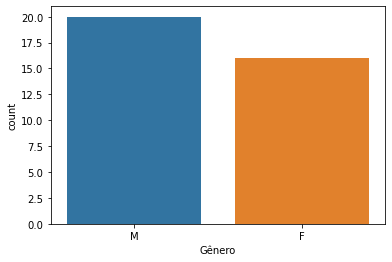

In [208]:
#Gráficos em barras 
sns.countplot(x ='Gênero', data = df)

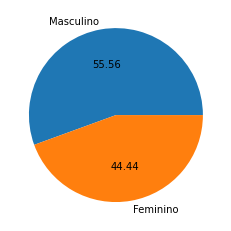

In [209]:
#Gráfico de pizza
plt.pie(df["Gênero"].value_counts(), labels = ["Masculino","Feminino"], autopct = '%.2f')
plt.show()

<AxesSubplot:xlabel='Estado Civil', ylabel='count'>

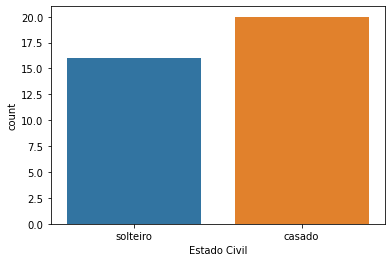

In [216]:
#Gráficos em barras 
sns.countplot(x ='Estado Civil', data = df)

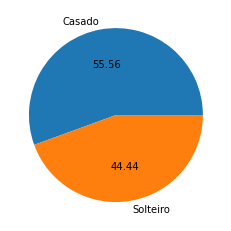

In [215]:
#Gráfico de pizza
plt.pie(df["Estado Civil"].value_counts(), labels = ["Casado","Solteiro"], autopct = '%.2f')
plt.show()

<AxesSubplot:xlabel='Grau de Instrução', ylabel='count'>

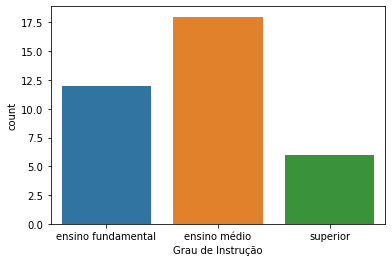

In [217]:
#Gráficos em barras 
sns.countplot(x ='Grau de Instrução', data = df)

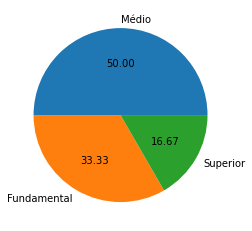

In [220]:
#Gráfico de pizza
plt.pie(df["Grau de Instrução"].value_counts(), labels = ["Médio","Fundamental","Superior"], autopct = '%.2f')
plt.show()

<AxesSubplot:xlabel='Região de Procedência', ylabel='count'>

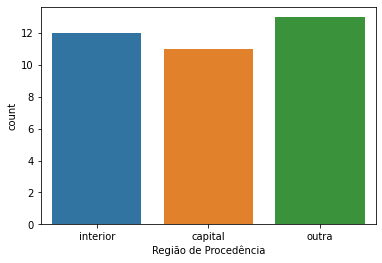

In [222]:
#Gráficos em barras 
sns.countplot(x ='Região de Procedência', data = df)

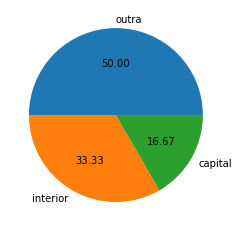

In [223]:
#Gráfico de pizza
plt.pie(df["Grau de Instrução"].value_counts(), labels = ["outra","interior","capital"], autopct = '%.2f')
plt.show()

**Gráficos para variáveis quantitativas**

Para variáveis **quantitativas** podemos considerar uma variedade maior de representações gráficas, como os exemplos abaixo.

**Boxplot**

<AxesSubplot:xlabel='Salario (x Sal Min)'>

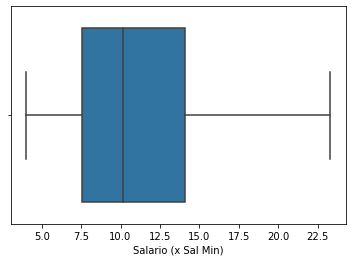

In [316]:
sns.boxplot(x ='Salario (x Sal Min)', data = df) 

<AxesSubplot:xlabel='Idade'>

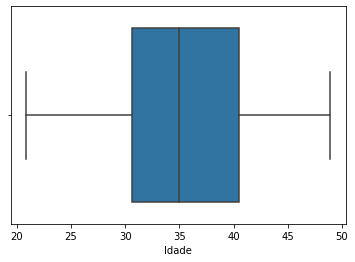

In [317]:
sns.boxplot(x ='Idade', data = df)

**Gráficos de Dispersão Univariados**:

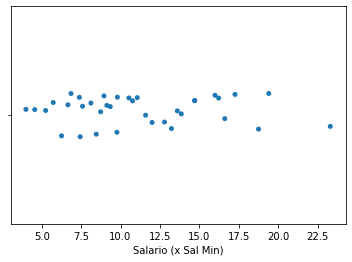

In [318]:
ax = sns.stripplot(x=df["Salario (x Sal Min)"])

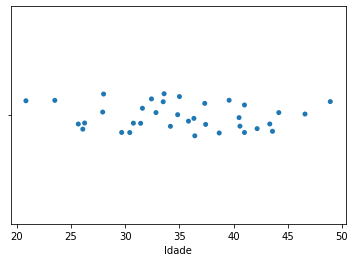

In [319]:
ax = sns.stripplot(x=df["Idade"])

**Histograma**

Um dos gráficos mais importantes para exibir distribuição de frequência de **variáveis quantitativas** é o **histograma**. <br>

Este gráfico pode ser pensado como uma **representação gráfica da tabela de frequência**, em que as barras mostram o quão grande é a frequência nos intervalos. Assim, sua construção pode ser feita de forma similar ao procedimento empregado para construir a tabela de frequências com intervalos nas classes.<br>

**Gráficos para variáveis quantitativas contínuas**

No exemplo anterior, escolhi dividir a variável **Salario (x Sal Min)** em **fx_salario** em 4 faixas utilizando o intervalo interquartil como parâmetro para determinar a amplitude cada uma. É uma escolha possível quando a amostra não é igualmente distribuída e queremos que cada faixa represente 25% dos valores amostrais.

No entanto, a regra mais utilizada em estatística é a **Regra de Sturges** para definição ótima de número de faixas, desde que  não existam agrupamentos extremos, ou número excessivo de classes que não permite resumir a amostra.  

Também pode-se utilizar a raiz de N (onde N é o tamanho da amostra). No nosso exemplo, o dataset tem N = 36. Logo, 6 faixas salariais seriam criadas. Mas vamos nos ater à regra de Sturges que é mais sofisticada.

**Regra de Sturges**

A **Regra Sturges** é um método empírico amplamente usado em estatística descritiva para determinar o **número de classes** que devem existir em um **histograma de frequência**, a fim de classificar um conjunto de dados representando uma amostra ou população:

                                           k = 1 + 3,322 * log10(N) 

Onde **N** é o tamanho da amostra.

Se necessário, pode-se arredondar o resultado para um número inteiro.

In [8]:
#Pelo resultado abaixo teríamos a divisão em 12 faixas salariais
k = 1 + 3.322 * (math.log(len(df.index)))
k = int(k)
k

12

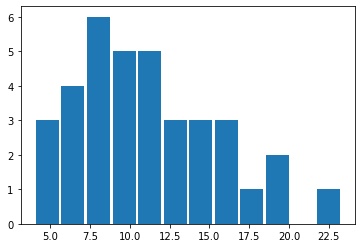

In [9]:
#Histrograma com 12 faixas salariais
plt.hist(df['Salario (x Sal Min)'], k, rwidth=0.9)
plt.show()

A saber, a amplitude de cada faixa será dada por:

                        amplitude = (limite superior - limite inferior) / k

In [10]:
a = (max(df['Salario (x Sal Min)']) - min(df['Salario (x Sal Min)']))/k
a

1.6083333333333334

Isso é, dada uma lista de salários que, conforme a base de dados, é: <br>

**[4.00, 4.56, 5.25, 5.73, 6.26, 6.66, 6.86, 7.39, 7.59, 7.44, 8.12, 8.46, 8.74, 8.95, 9.13, 9.35, 9.77, 9.80, 10.53, 10.76, 11.06, 11.59, 12.00, 12.79, 13.23, 13.60, 13.85, 14.69, 14.71, 15.99, 16.22, 16.61, 17.26, 18.75, 19.40, 23.30]**

Dividindo-a em 12 faixas com intervalo de amplitude de 1.6083, termos a seguinte tabela de frequências: 

In [12]:
fx_salario_sturge_0 = 4
fx_salario_sturge_1 = 4 + a * (1)
fx_salario_sturge_2 = 4 + a * (2)
fx_salario_sturge_3 = 4 + a * (3)
fx_salario_sturge_4 = 4 + a * (4)
fx_salario_sturge_5 = 4 + a * (5)
fx_salario_sturge_6 = 4 + a * (6)
fx_salario_sturge_7 = 4 + a * (7)
fx_salario_sturge_8 = 4 + a * (8)
fx_salario_sturge_9 = 4 + a * (9)
fx_salario_sturge_10 = 4 + a * (10)
fx_salario_sturge_11 = 4 + a * (11)
fx_salario_sturge_12 = 4 + a * (12)

In [17]:
df['fx_salario_sturge'] = 0
df.loc[(df['Salario (x Sal Min)'] >= fx_salario_sturge_0) & (df['Salario (x Sal Min)'] <= fx_salario_sturge_1), 'fx_salario_sturge']= 1
df.loc[(df['Salario (x Sal Min)'] >= fx_salario_sturge_1) & (df['Salario (x Sal Min)'] <= fx_salario_sturge_2), 'fx_salario_sturge']= 2
df.loc[(df['Salario (x Sal Min)'] >= fx_salario_sturge_2) & (df['Salario (x Sal Min)'] <= fx_salario_sturge_3), 'fx_salario_sturge']= 3
df.loc[(df['Salario (x Sal Min)'] >= fx_salario_sturge_3) & (df['Salario (x Sal Min)'] <= fx_salario_sturge_4), 'fx_salario_sturge']= 4
df.loc[(df['Salario (x Sal Min)'] >= fx_salario_sturge_4) & (df['Salario (x Sal Min)'] <= fx_salario_sturge_5), 'fx_salario_sturge']= 5
df.loc[(df['Salario (x Sal Min)'] >= fx_salario_sturge_5) & (df['Salario (x Sal Min)'] <= fx_salario_sturge_6), 'fx_salario_sturge']= 6
df.loc[(df['Salario (x Sal Min)'] >= fx_salario_sturge_6) & (df['Salario (x Sal Min)'] <= fx_salario_sturge_7), 'fx_salario_sturge']= 7
df.loc[(df['Salario (x Sal Min)'] >= fx_salario_sturge_7) & (df['Salario (x Sal Min)'] <= fx_salario_sturge_8), 'fx_salario_sturge']= 8
df.loc[(df['Salario (x Sal Min)'] >= fx_salario_sturge_8) & (df['Salario (x Sal Min)'] <= fx_salario_sturge_9), 'fx_salario_sturge']= 9
df.loc[(df['Salario (x Sal Min)'] >= fx_salario_sturge_9) & (df['Salario (x Sal Min)'] <= fx_salario_sturge_10), 'fx_salario_sturge']= 10
df.loc[(df['Salario (x Sal Min)'] >= fx_salario_sturge_10) & (df['Salario (x Sal Min)'] <= fx_salario_sturge_11), 'fx_salario_sturge']= 11
df.loc[(df['Salario (x Sal Min)'] > fx_salario_sturge_11), 'fx_salario_sturge']= 12
df

,N,Gênero,Estado Civil,Grau de Instrução,N de Filhos,Salario (x Sal Min),Anos,Meses,Região de Procedência,fx_salario_sturge
0,1,M,solteiro,ensino fundamental,0,4.00,26,3,interior,1
1,2,F,casado,ensino fundamental,1,4.56,32,10,capital,1
2,3,M,casado,ensino fundamental,2,5.25,36,5,capital,1
3,4,F,solteiro,ensino médio,0,5.73,20,10,outra,2
4,5,M,solteiro,ensino fundamental,0,6.26,40,7,outra,2
5,6,M,casado,ensino fundamental,0,6.66,28,0,interior,2
6,7,M,solteiro,ensino fundamental,0,6.86,41,0,interior,2
7,8,F,solteiro,ensino fundamental,0,7.39,43,4,capital,3
8,9,M,casado,ensino médio,1,7.59,34,10,capital,3
9,10,F,solteiro,ensino médio,0,7.44,23,6,outra,3


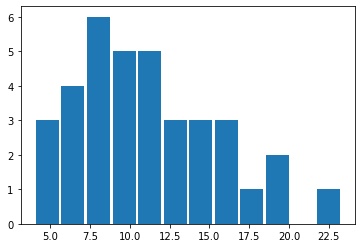

In [18]:
#Histrograma com 12 faixas salariais (pois o tamanho da amostra é 36)
plt.hist(df['Salario (x Sal Min)'], k, rwidth=0.9)
plt.show()

**Entendimento**: <br>
A primeira faixa tem 3 ocorrências (eixo x), assim como descrito na tabela de frequências na imagem acima. <br>
A segunda faixa tem 4 ocorrências <br>
A terceira tem 6 ocorrências <br>
E assim por diante até a 12ª faixa, com uma ocorrência

Utilizando as faixas criadas anteriormente com os **intervalos interquartis** vamos obter o seguinte histograma:

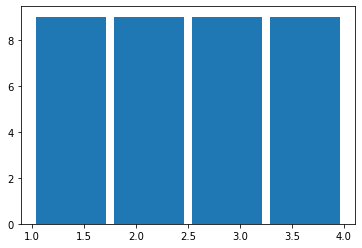

In [279]:
#Distribuição dos salários subdivididos em 4 faixas distintas
plt.hist(df['fx_salario'], 4, rwidth=0.9)
plt.show()

**Entendimento**: 9 ocorrências em cada faixa de idade. Isso ocorre porque a divisão por quartis faz com que cada faixa contenha 25% da amostra. Assim todas as 4 faixas tem a mesma densidade.<br>

Da mesma maneira, o histograma por **fx_idade** terá o mesmo formato, pois foi dividido pelo método dos quartis:

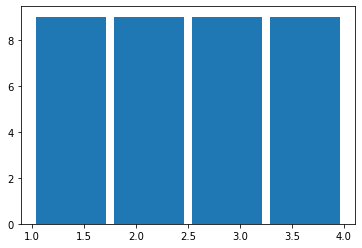

In [282]:
#Distribuição dos salários subdivididos em 4 faixas distintas
plt.hist(df['fx_idade'], 4, rwidth=0.9)
plt.show()

Caso queira utilizar a **Regra de Sturge** para calcular o números ideal de faixas, você teria o seguinte histograma:

In [286]:
#Pelo resultado abaixo teríamos a divisão em 12 faixas salariais (pois o tamanho da amostra é 36)
k = 1 + 3.322 * (math.log(len(df.index)))
k = int(k)
k

12

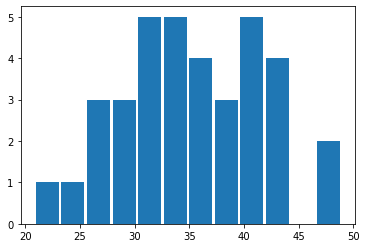

In [287]:
plt.hist(df['Idade'], k, rwidth=0.9)
plt.show()

**Entendimento:**<br>
A primeira faixa tem 1 ocorrência (eixo x), assim como descrito na tabela de frequências na imagem acima.<br>
A segunda faixa tem também 1 ocorrências<br>
A terceira tem 3 ocorrências<br>
E assim por diante até a 12ª faixa, com 2 ocorrências

**Obs:** Você até pode fazer o histograma de uma **variável quantitativa contínua** sem discretização por faixas. Mas com um número grande de observações a interpretação do gráfico fica prejudicada. Por exemplo:

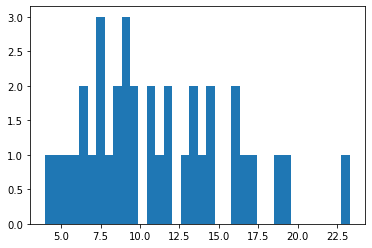

In [300]:
plt.hist(df['Salario (x Sal Min)'], 36, rwidth=1)
plt.show()

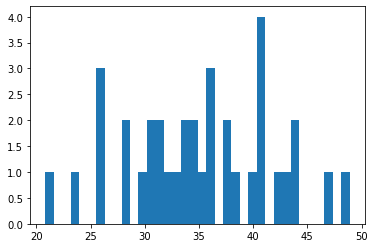

In [301]:
plt.hist(df['Idade'], 36, rwidth=1)
plt.show()

Deste modo é preferível efetuar uma discretização para facilitar a interpretação da distribuição da sua amostra.

**Gráficos para variáveis quantitativas discretas** <br>

Para variáveis **quantitativas discretas** você não precisa fazer o step de discretização por faixas:

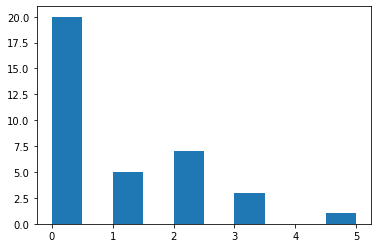

In [292]:
plt.hist(df['N de Filhos'], rwidth=1)
plt.show()

Além do gráfico de barras você também pode usar **gráficos de dispersão univariados** para representar variáveis **quantitativas discretas** 

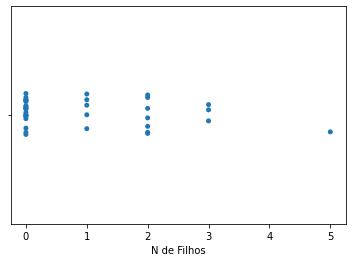

In [321]:
ax = sns.stripplot(x=df["N de Filhos"])